## World Happiness report
 In this notebook, we analyse the world happiness report. Finding out the most and lest happy countries. 

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df=pd.read_csv("world-happiness-report-2021.csv",  index_col=None)

In [3]:
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [4]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
df["Country name"].nunique()

149

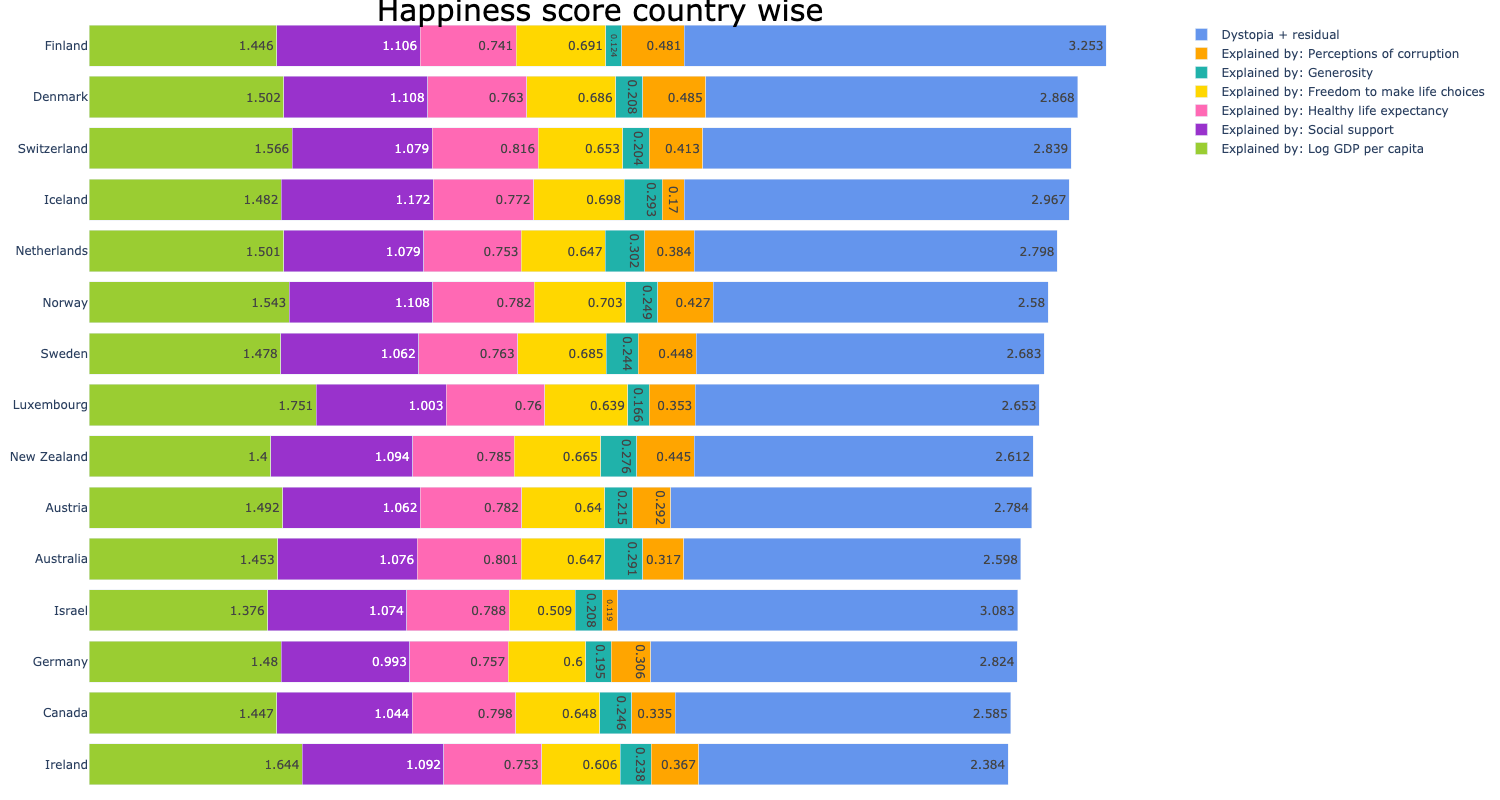

In [7]:
x=df["Country name"].values[0:15]
fig = go.Figure(data=[
    go.Bar( y=x,x=df["Explained by: Log GDP per capita"].values[0:15], name='Explained by: Log GDP per capita', 
           orientation='h',marker={'color':"#9acd32"},text=df["Explained by: Log GDP per capita"].values[0:15]),
    go.Bar( y=x, x=df["Explained by: Social support"].values[0:15], name='Explained by: Social support',
           orientation='h',marker={'color':"#9932cc"},text=df["Explained by: Social support"].values[0:15]),
    go.Bar(y=x, x=df["Explained by: Healthy life expectancy"].values[0:15], name='Explained by: Healthy life expectancy',
           orientation='h',marker={'color':"#ff69b4"},text=df["Explained by: Healthy life expectancy"].values[0:15]),
    go.Bar(y=x, x=df["Explained by: Freedom to make life choices"].values[0:15], name='Explained by: Freedom to make life choices',
           orientation='h',marker={'color':"#ffd700"},text=df["Explained by: Freedom to make life choices"].values[0:15]),
    go.Bar(y=x, x=df["Explained by: Generosity"].values[0:15], name='Explained by: Generosity',
           orientation='h',marker={'color':"#20b2aa"},text=df["Explained by: Generosity"].values[0:15]),
    go.Bar(y=x, x=df["Explained by: Perceptions of corruption"].values[0:15], name='Explained by: Perceptions of corruption',
           orientation='h',marker={'color':"#ffa500"},text=df["Explained by: Perceptions of corruption"].values[0:15]),
    go.Bar(y=x, x=df["Dystopia + residual"].values[0:15], name='Dystopia + residual',
           orientation='h',marker={'color':"#6495ed"},text=df["Dystopia + residual"].values[0:15]),
])
fig.update_layout(barmode='stack', yaxis=dict(autorange='reversed',showgrid=False) , xaxis=dict(showgrid=False,showticklabels=False)
                  ,plot_bgcolor= 'white', paper_bgcolor='white', margin = dict(t=20, l=25, r=10, b=10)
     )
fig.update_layout(title={
        'text': " Happiness score country wise",
        'y':1.0,
        'x':0.4,
        },title_font_color="black",title_font_size=30
                   )
fig.show('png', width=1500, height=800)

Finland is the most happiest country in 2021. Afghanistan being the least happy country in 2021.

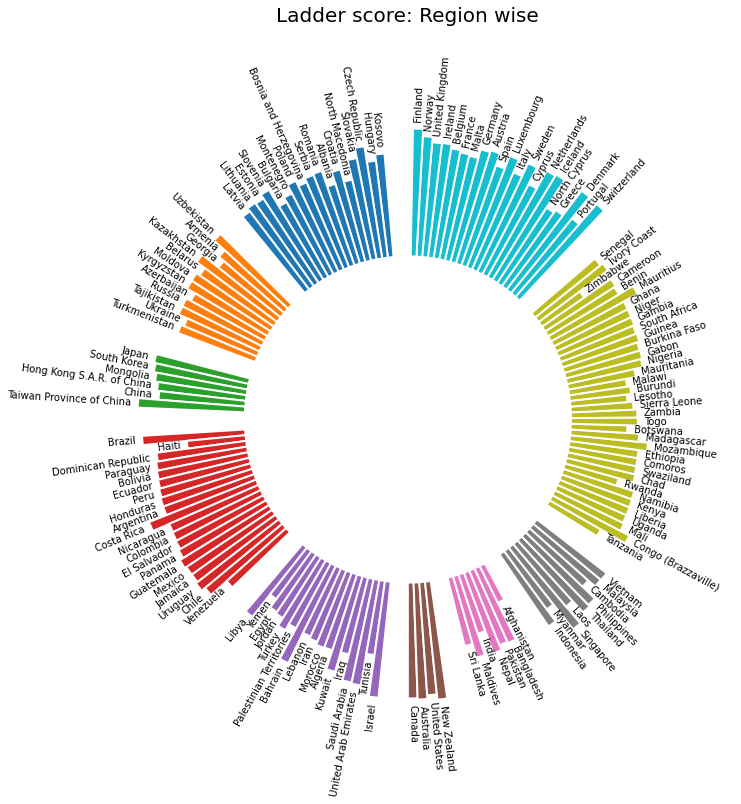

In [34]:
def add_labels(angles, values, labels, offset, ax):
    
    padding = 4
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        rotation, alignment = get_label_rotation(angle, offset)
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 
        
def get_label_rotation(angle, offset):
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment        



df2=df.copy()
df2.sort_values(by='Regional indicator' , inplace=True)

ANGLES = np.linspace(0, 2 * np.pi, len(df2), endpoint=False)
VALUES = (df2["Ladder score"].values)*10
LABELS= df2["Country name"].values
GROUP = df2["Regional indicator"].values


OFFSET = np.pi / 2

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)


offset = 0
IDXS = []
GROUPS_SIZE = [17, 12,  6, 20, 17,  4,  7,  9, 36, 21]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(22, 12), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])


GROUPS_SIZE = [17, 12,  6, 20, 17,  4,  7,  9, 36, 21]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)
plt.title('Ladder score: Region wise',  x=0.5, y=1.1,fontsize=20) 
add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)



##   Key factors to a happy life: A closer look

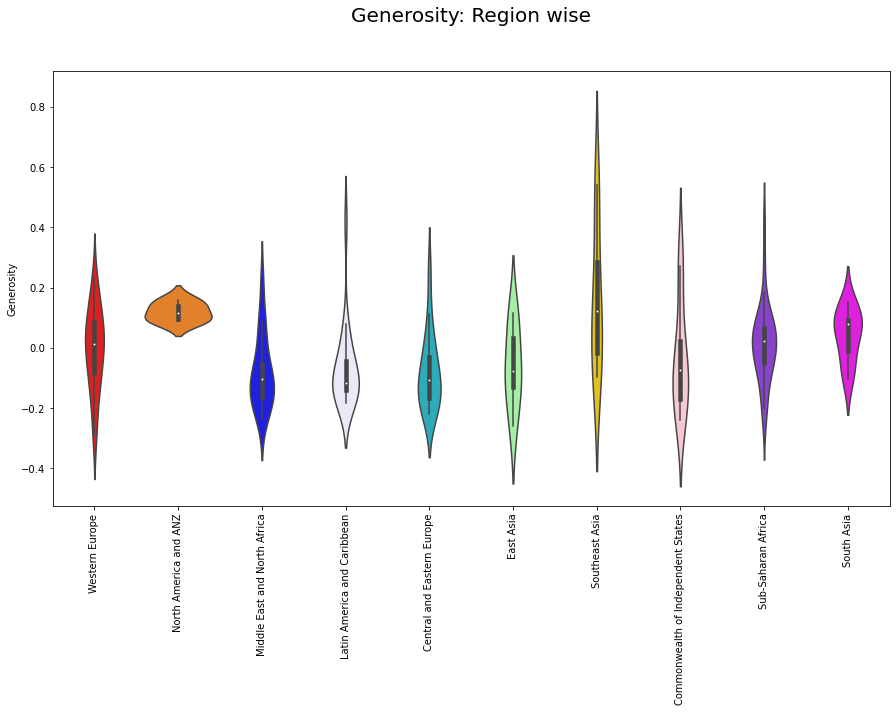

In [12]:
palette = {"Western Europe":"red",
           "North America and ANZ":"tab:orange", 
           "Latin America and Caribbean":"lavender",
           "Central and Eastern Europe":"tab:cyan",
           "East Asia":"palegreen", 
           "Southeast Asia":"gold",
           "Commonwealth of Independent States":"pink",
           "Sub-Saharan Africa" :"blueviolet",
           "South Asia":"magenta",
           "Middle East and North Africa":"blue"
          }


plt.figure(figsize=(15,8))
ax = sns.violinplot(y="Generosity", x="Regional indicator",
                    data=df, palette=palette, split=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('Generosity: Region wise',  x=0.5, y=1.1,fontsize=20) 
plt.xlabel(None);

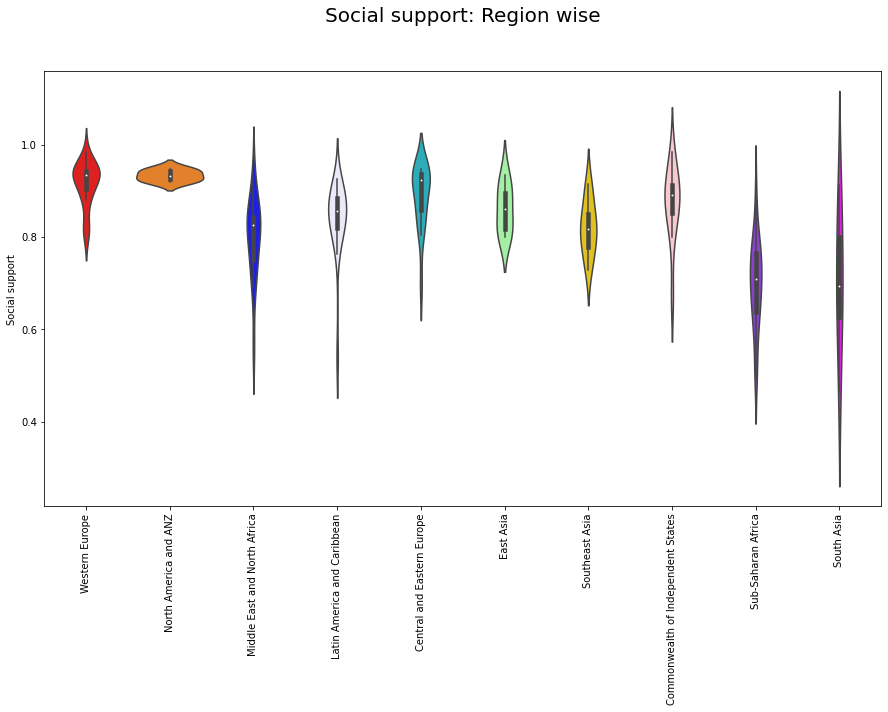

In [13]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(y="Social support", x="Regional indicator",
                    data=df, palette=palette, split=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('Social support: Region wise',  x=0.5, y=1.1,fontsize=20) 
plt.xlabel(None);

In [15]:
df.loc[df["Generosity"].idxmin(),'Country name']

'Greece'

Least generous country in 2021 is Greece

In [17]:
df.loc[df["Generosity"].idxmax(),'Country name']

'Indonesia'

Most generous country is Indonesia

In [13]:
df.loc[df["Social support"].idxmax(),'Country name']

'Iceland'

In [14]:
df.loc[df["Social support"].idxmin(),'Country name']

'Afghanistan'

In [21]:
df.loc[df["Perceptions of corruption"].idxmin(),'Country name']

'Singapore'

In [22]:
df.loc[df["Perceptions of corruption"].idxmax(),'Country name']

'Croatia'

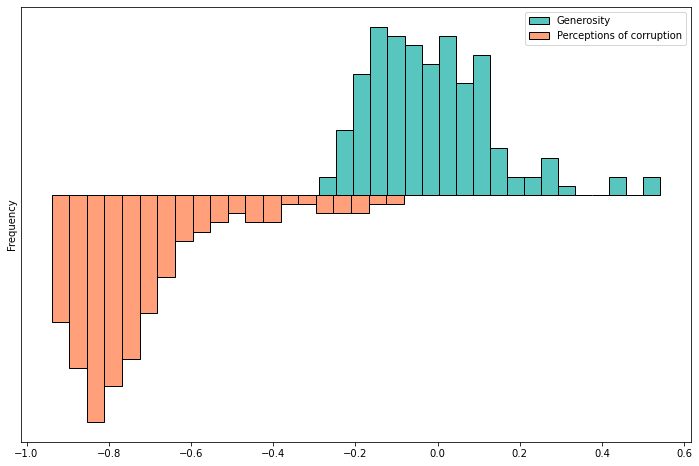

In [18]:
plt.rcParams["figure.figsize"]=12,8
n_bins = 20
sns.histplot(x=df["Generosity"], stat="density", bins=n_bins, edgecolor='black',color='#20b2aa', label='Generosity')



heights, bins = np.histogram(df["Perceptions of corruption"], density=True, bins=n_bins) 

heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1


plt.bar(bin_pos, heights, width=bin_width, edgecolor='black',color='#ffa07a',label='Perceptions of corruption')

plt.legend()
plt.xlabel(None);
plt.ylabel('Frequency');
plt.yticks([])
plt.show()

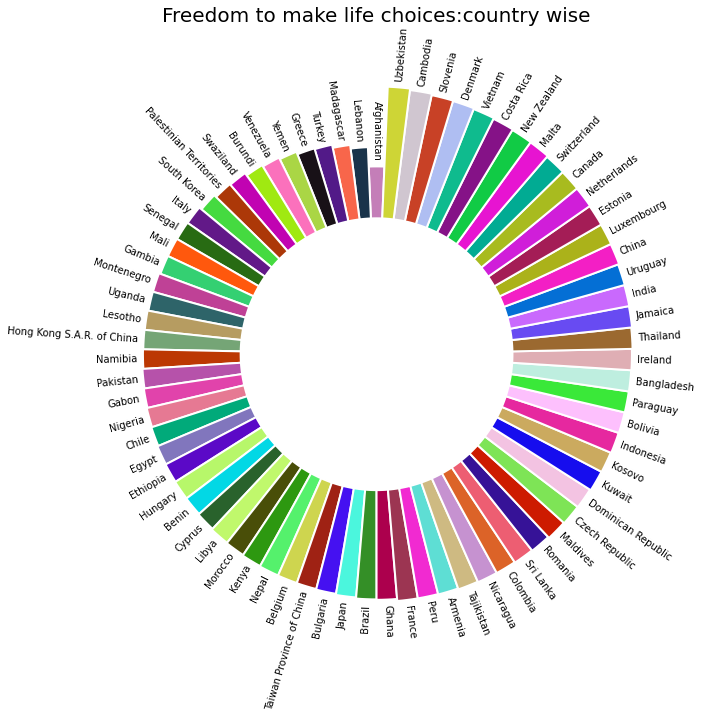

In [20]:
def add_labels(angles, values, labels, offset, ax):
    
    padding = 4
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        rotation, alignment = get_label_rotation(angle, offset)
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 
        
def get_label_rotation(angle, offset):
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment 

df1=df.sort_values(by=["Freedom to make life choices"])
VALUES = (df1["Freedom to make life choices"].values[0::2])*100
LABELS = df1["Country name"].values[0::2]
ANGLES = np.linspace(0, 2 * np.pi, len(VALUES), endpoint=False)



WIDTH = 2 * np.pi / len(VALUES)

OFFSET = np.pi / 2


fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})


ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)

ax.set_frame_on(False)

ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])


col=[]
import random
for j in range(len(VALUES)):
    rand_colors = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])# Add bars
    col.append(rand_colors)
    
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color=col, edgecolor="white"
)
plt.title('Freedom to make life choices:country wise',  x=0.5, y=1.1,fontsize=20) 



add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)



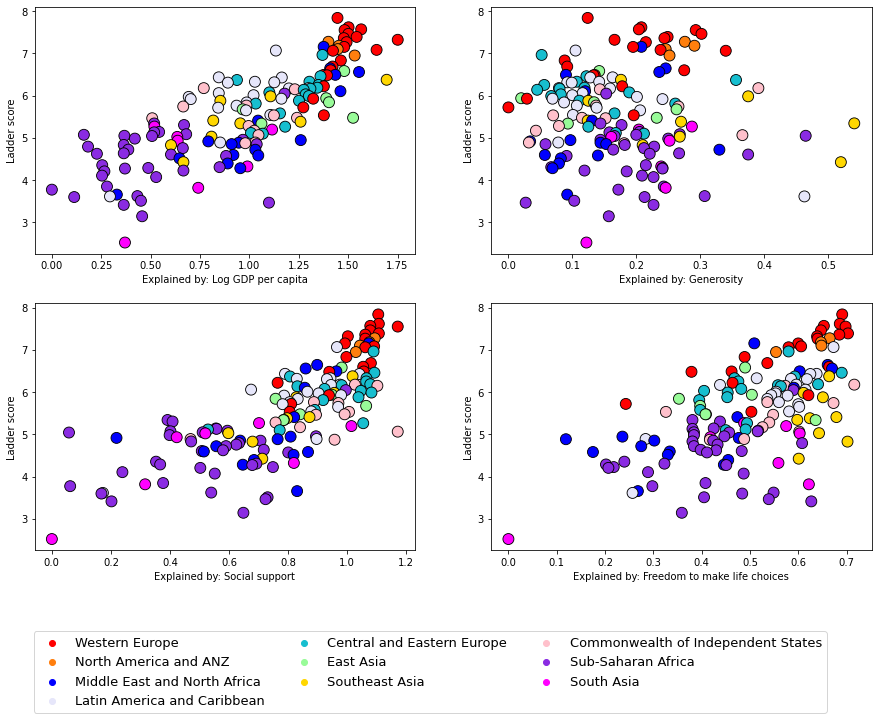

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(ax=axes[0, 0],
    data=df, x="Explained by: Log GDP per capita", y="Ladder score", hue='Regional indicator', s=120,
    alpha=1,edgecolor="black",palette=palette,legend=None
)

sns.scatterplot(ax=axes[0, 1],
    data=df, x="Explained by: Generosity", y="Ladder score", hue='Regional indicator', s=120,
    alpha=1,edgecolor="black",palette=palette,legend=None
)
sns.scatterplot(ax=axes[1, 1],
    data=df, x="Explained by: Freedom to make life choices", y="Ladder score", hue='Regional indicator', s=120,
    alpha=1,edgecolor="black",palette=palette,legend='brief', 
)
sns.scatterplot(ax=axes[1, 0],
    data=df, x="Explained by: Social support", y="Ladder score", hue='Regional indicator', s=120,
    alpha=1,edgecolor="black",palette=palette,legend=None
)
plt.legend(loc=0, 
          ncol=3, bbox_to_anchor=[0.6,-.3,0.3,0],fontsize='13');


In [27]:
# Randomly slicing df
df_sub1=df.iloc[0:5]
df_sub2=df.iloc[140:]
df_sub3=df.iloc[80:95]

In [28]:
df_SUB=pd.concat([df_sub1,df_sub2,df_sub3])

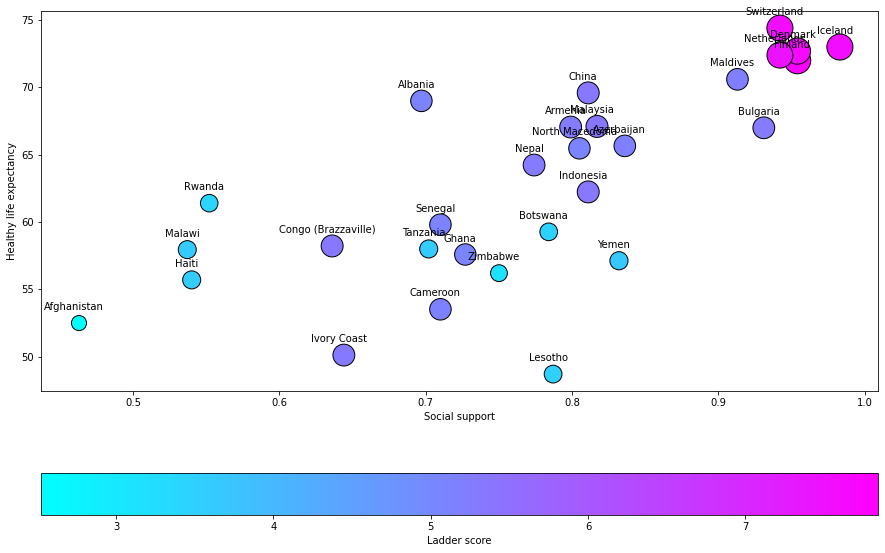

In [30]:

plt.figure(figsize=(15,10))
xs=df_SUB["Social support"].values
ys=df_SUB["Healthy life expectancy"].values
size=df_SUB["Ladder score"].values
label=df_SUB["Country name"].values.tolist()


plt.scatter(xs,ys, c=size,  s= size*90,edgecolor='black',cmap="cool")

i=0
for x,y in zip(xs,ys):
    plt.annotate(label[i], 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(-5,13),
                 ha='center') 
    i=i+1
    
plt.colorbar(label="Ladder score", orientation="horizontal")
plt.xlabel('Social support')  
plt.ylabel('Healthy life expectancy');   

In [31]:
value_min=[]
country_min=[]
w_region_min=[]
value_max=[]
country_max=[]
w_region_max=[]



for region in df["Regional indicator"].unique():
    df1=df[df["Regional indicator"]==region]
    #print(df1.loc[df1["Ladder score"].idxmin(), 'Ladder score'],df1.loc[df1["Ladder score"].idxmin(), 'Country name'])
    value_min.append(df1.loc[df1["Ladder score"].idxmin(), 'Ladder score'])
    country_min.append(df1.loc[df1["Ladder score"].idxmin(), 'Country name'])
    w_region_min.append(region)
    value_max.append(df1.loc[df1["Ladder score"].idxmax(), 'Ladder score'])
    country_max.append(df1.loc[df1["Ladder score"].idxmax(), 'Country name'])
    w_region_max.append(region)    
    
data_min = {'w_region': w_region_min, 'country': country_min, 'value':value_min}  
Min_region = pd.DataFrame(data_min)   
data_max = {'w_region': w_region_max, 'country': country_max, 'value':value_max}  
Max_region = pd.DataFrame(data_max )


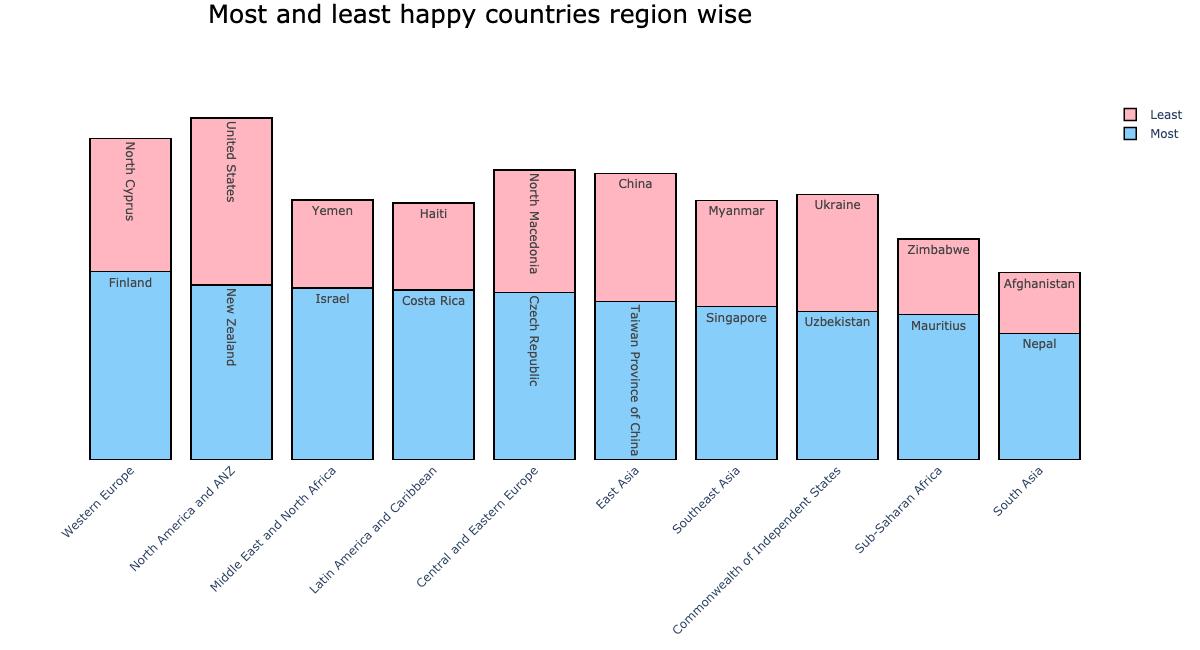

In [114]:


fig = go.Figure(data=[
    go.Bar(name='Most',x=Max_region["w_region"].values, y=Max_region["value"].values,
           marker={'color':"#87cefa"},text = Max_region["country"].values,marker_line=dict(width=1.5, color='black') ),
    go.Bar(name='Least',x=Min_region["w_region"].values, y=Min_region["value"].values,
           marker={'color':"#ffb6c1"}, marker_line=dict(width=1.5, color='black'), text = Min_region["country"].values )
])
fig.update_layout(barmode='stack', yaxis=dict(showgrid=False,showticklabels=False), 
                  xaxis=dict(showgrid=False,showticklabels=True,tickangle=-45),
                  plot_bgcolor= 'white', paper_bgcolor='white'
     )

fig.update_layout(title={
        'text': "Most and least happy countries region wise",
        'y':1.0,
        'x':0.4,
        },title_font_color="black",title_font_size=25,title_pad_t=5)
fig.show('png', width=1200, height=650)

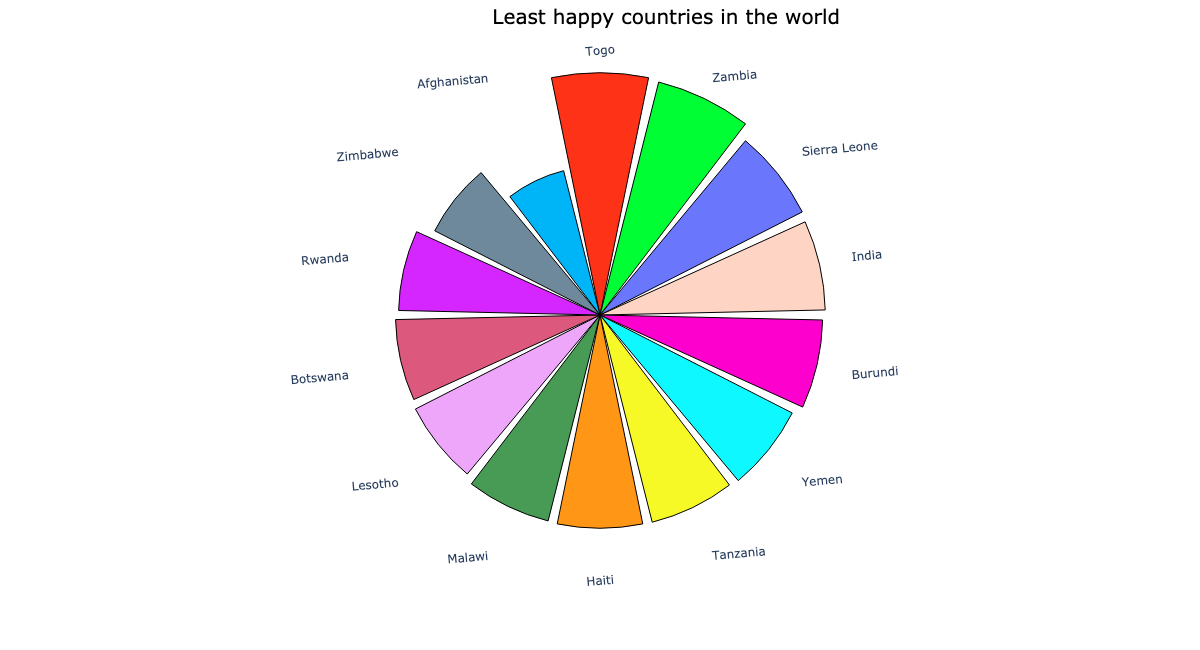

In [32]:
fig= px.bar_polar( r=df["Ladder score"].values[135::],
                                 theta=df["Country name"].values[135::],
                 color = df["Ladder score"].values[135::])

fig.update_polars(radialaxis_showline=False, bgcolor="white",radialaxis=dict(showgrid=False,showticklabels=False),
                  angularaxis=dict(tickangle=-5,showticklabels=True))

fig.update_traces(
          marker_line_color="black",marker_line_width=1,marker=dict(
          color=px.colors.qualitative.Light24)
)
fig.update_layout(title={
        'text': "Least happy countries in the world",
        'y':1.0,
        'x':0.7,
        },title_font_color="black",title_font_size=20,title_pad_t=10)
fig.show('png', width=1200, height=650)